

```
# This is formatted as code
```

# Assignment 4: Differentiation and optimization

In [3]:
import sympy as sym # symbolic differentiation
import jax          # algorithmic differentiation
import jax.numpy as np
import matplotlib.pyplot as plt

## Question 1: Differentiations

Function 

$$f(a, b) = \frac a b cos(a)^2 \exp \left( - \frac {a^2} {b^2}\right)$$

is given.

1. Derive the partial derivatives of $f(a, b)$ by $a$ and $b$. (Write them in this text)

    $$\frac {\partial f} {\partial a} = e^{-a^2}\cos ^2\left(a\right)+a\left(-e^{-a^2}\sin \left(2a\right)-2ae^{-a^2}\cos ^2\left(a\right)\right) $$ 
    $$\frac {\partial f} {\partial b} = \cos ^2\left(1\right)\left(-\frac{e^{-\frac{1}{b^2}}}{b^2}+\frac{2e^{-\frac{1}{b^2}}}{b^4}\right) $$

2. Implement the derivatives as Python functions:
  1. According to symbolic expressions. (print the expressions)
  2. Using algorithmic differentiation (with `jax`).
      * For a two variable function, $ f(a,b) $, its gradients by $x$ and $y$ can be obtained like this: df_dxy = jax.grad(f, argnums=(0, 1)). The x, and y derivatives are then: df_dxy[0] = df_dx, and df_dxy[1] = df_dy.

$-$

  
Compare the accuracy of symbolic and algorithmic differentiation:


1.   Choose a number of points in the range: $a\in(-20, 20)$, and $b\in(1, 100)$.
2.   Calculate the squared error between simbolic and algorithmic differentiation for each set of points $(a,b)$.
3. Average all the errors. (print the average error obtained)



In [4]:
import jax.numpy as jnp
from sympy import symbols, cos, diff


a = sym.Symbol('a')
b = sym.Symbol('b')
f=((a/b)*(sym.cos(a)*sym.cos(a))*(sym.exp(-(a*a)/(b*b))))
#symbolic expressions
def symbolic_difa():
  a = sym.Symbol('a')
  b = sym.Symbol('b')
  f=((a/b)*(sym.cos(a)*sym.cos(a))*(sym.exp(-(a*a)/(b*b))))
  dif_a=sym.diff(f,a)
  print(dif_a)

def symbolic_difb():
  a = sym.Symbol('a')
  b = sym.Symbol('b')
  f=((a/b)*(sym.cos(a)*sym.cos(a))*(sym.exp(-(a*a)/(b*b))))
  dif_b=sym.diff(f,b)
  print(dif_b)

def exp(x):
  return np.exp(x)

def cos(x):
  return np.cos(x)

def sin(x):
  return np.sin(x)


def last_symbolic_diff_a(a,b):
  return -2*a**2*exp(-a**2/b**2)*cos(a)**2/b**3 - 2*a*exp(-a**2/b**2)*sin(a)*cos(a)/b + exp(-a**2/b**2)*cos(a)**2/b


def last_symbolic_diff_b(a,b):
  return 2*a**3*exp(-a**2/b**2)*cos(a)**2/b**4 - a*exp(-a**2/b**2)*cos(a)**2/b**2

#algorithmic differentiation 
def foo(a,b):
  x = (a/b)*(np.cos(a))*(np.cos(a))
  y = np.exp((-a*a)/(b*b))
  return x*y

def algo_diff():
  df_da = jax.grad(foo, argnums=0)
  df_db = jax.grad(foo, argnums=1)
  return df_da,df_db

df_dab = jax.grad(foo, argnums=(0,1))
#----------------------------------------------------


def mse():
  lst= [(-19.1,1.1),(-17.1,20.1),(10.1,50.1),(17.1,70.1),(19.1,99.1)]
  err1=0
  err2=0
  for (x,y) in lst:
    first_x, first_y = df_dab(x,y)
    second_x, second_y=last_symbolic_diff_a(x,y), last_symbolic_diff_b(x,y)
    err1 +=(first_x -second_x)**2 
    err2 += (first_y-second_y)**2
  err1=err1/len(lst)
  err2=err2/len(lst)
  return (err1+err2)

mse()

DeviceArray(1.9985438e-16, dtype=float32, weak_type=True)

3. Plot 
  * $f(a, 10)$, $\frac {\partial f(a, 10)} {\partial a}$ for range $a \in [-20, 20]$, 
  * $f(10, b)$, $\frac {\partial f(10, b)} {\partial b}$ for range $b \in 1, 100$.

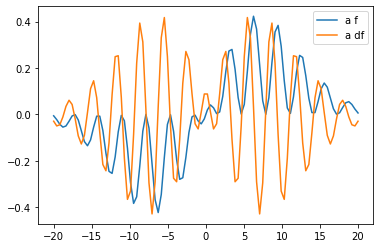

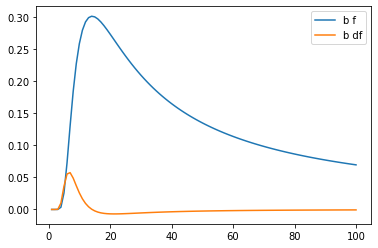

In [6]:
def f_of_a_10(a):
  b=10
  x = (a/b)*(np.cos(a))*(np.cos(a))
  y = np.exp((-a*a)/(b*b))
  return x*y

def f_of_10_b(b):
  a=10
  x = (a/b)*(np.cos(a))*(np.cos(a))
  y = np.exp((-a*a)/(b*b))
  return x*y

def algo_diff2():
  df_da = jax.grad(f_of_a_10)
  return df_da

def algo_diff3():
  df_db = jax.grad(f_of_10_b)
  return df_db

diff_of_a = algo_diff2()
diff_of_b = algo_diff3()

a = np.linspace(-20,20,100)
b = np.linspace(1,100,100)
plt.plot(a, [ foo(a,10) for a in a], label="a f")
plt.plot(a, [ diff_of_a(a) for a in a], label="a df")
plt.legend()
plt.show()
plt.plot(b, [ foo(10,b) for b in b], label="b f")
plt.plot(b, [ diff_of_b(b) for b in b], label="b df")
plt.legend()
plt.show()


4. Implement a function for approximate numerical differentiation, given the difference size $h$.

In [8]:
def diff(f, x, h):
  """Differentiates f at x numerically, using h as the difference.
  """
  step1=f(x)
  step2=f(x+h)
  approx_diff=(step2-step1)/h
  return  approx_diff



5. Find the best difference size $h$ for differentiating
   * $f(3, 10)$ by $a$.
   * $f(1, 1)$ by $b$.

(Print the best step size, the derivative obtained and the difference between the numerical and the exact (algorithmic or symbolic) derivatives)

The best difference size minimizes the error of numerical differentiation relative to the exact differentiation.

Note: In this excercise it is recommended to use gradient descent, however a simple search is also accepted.


In [68]:
def diff2(f, a, b, h):
  return (f(a+h, b+h) - f(a,b)) / h



# check for f(3,10) by a
h = 0.01
first_x, first_y = df_dab(3.,10.)
exa = first_x
nume = diff2(foo,3.0,10.0,h)
min_error = abs(nume - exa)

for i in range(10000):
  nume = diff2(foo,3.0,10.0,(i+2)*0.0001)
  if(abs(nume - exa) < min_error):
    min_error = abs(nume - exa)
    h = (i+2)*0.01

print("f(3,10) by a :")
print(f"best h: { h } derivative obtained: { diff2(foo,3.0,10.0,h) }")
print("difference : ", min_error)


#check for f(1,1) by b
h = 0.01
first_x, first_y = df_dab(1.,1.)
exa = first_y
nume = diff2(foo,1.,1.,h)
min_error = abs(nume - exa)


for i in range(10000):
  nume = diff2(foo,1.0,1.0,(i+2)*0.0001)
  if(abs(nume - exa) < min_error):
    min_error = abs(nume - exa)
    h = (i+2)*0.01

print(" f(1,1) by b:")
print("best h: ", h , " derivative obtained: ", min_error)
print("difference : ", abs(min_error - first_y))


f(3,10) by a :
best h: 0.05 derivative obtained: 0.11490583419799805
difference :  0.022088677
 f(1,1) by b:
best h:  100.01  derivative obtained:  0.15104671
difference :  0.043652907


## Question 2: Optimization

### Logistic regression

Logistic regression is a statiscal model that models the probability of an event happening. In binary logistic regression there is a single binary dependent variable coded by '0' or '1'.

We can express the data as a tuple $(x,y)=(data,outcome)=(x,0/1)$

To model the probability of event $x$, we can use the logistic function $p(x)=\frac{1}{1+e^{-(x-\mu)/s}}$.

To find the appropiate $\mu$, that maximizes the classifaction accuracy we minimize the loss function $-\sum_{i=1}^N (y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)))$.

In some cases, we give more importance to correctly classify one event over an other (like contracting an illness over not contracting it), and one way to express this is to add a "fixing parameter" in the loss function. One way this can be achieved is by adding weights: $-\sum_{i=1}^N (W_1y_i \log p(x_i) + W_2(1 - y_i) \log (1 - p(x_i)))$.


For a trial group of 20 rats, ratio of time exposed to a virus and the event of contracting that virus are given as a list of pairs (ratio, illness) (1 corresponds to having the illness):

In [41]:
rats = [(0.47, 0), (0.23, 0), (0.86, 1), (0.22, 0), (0.21, 1),
        (0.31, 0), (0.62, 0), (0.941, 1), (0.27, 0), (0.35, 1),
        (0.18, 0), (0.13, 0), (0.31, 1), (0.99, 1), (0.85, 1), 
        (0.35, 1), (0.6, 1), (0.89, 0), (0.6, 1), (0.92, 0)]

We want to predict rat illness based on the ratio of exposure to a virus. The prediction function is

$$illness = ratio \ge threshold.$$

The loss for this _classification_ problem is:

\begin{aligned}
& L = -\sum_{i=1}^N (W_1illness_i \log p_i + W_2(1 - illness_i) \log (1 - p_i)) \\
\mbox{where} & \\
& p_i = \frac 1 {1 + \exp(threshold - ratio_i)}
\\~\\
\mbox{and } &W_{1}, W_{2} \mbox{ are weights}
\end{aligned}

1. Implement the loss as a function of the threshold, and weights.

In [42]:
def loss(thr, W1=1, W2=1):
    l=0
    for pair in rats:
      pi=1/(1+np.exp(thr-pair[0]))
      l=l+(W1*pair[1]*np.log(pi) + W2*(1-pair[1])*np.log(1-pi))
    return -l

2. Plot the loss and the derivative of the loss by the threshold in the range $threshold \in (0.01, 0.99)$, and $ W_1, W_2 = 1$.

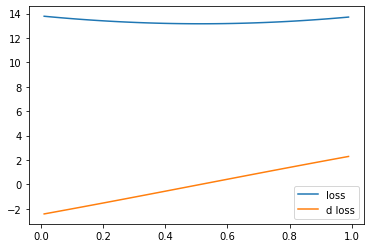

In [43]:
from random import random
illness=[rat[1] for rat in rats]

def loss_dg(thr):
    d=jax.grad(loss)
    return d(thr)

x = np.linspace(0.01, 0.99, 100)
d=jax.grad(loss)
plt.plot(x,[loss(x) for x in x], label="loss")
plt.plot(x,[loss_dg(x) for x in x], label="d loss")
plt.legend()

3. Find the best threshold using gradient descent, and $ W_1, W_2$ such that the number of true positives (rats which have the illness and were correctly classified) is greater than $80\%$, but the number of false positives ( rats which dont have the illness and were misclassified) is not $100\%$. (Note: you can fix $W_2$ to be 1)

In [47]:
def best():
    df = jax.grad(loss)
    x = 0.1*(random()-0.5)
    step=0.1
    for i in range(100):
      x -= df(x)*step
      step *= 0.995
    return x

print(best())


0.51433843


4. Find the best threshold using Newton's method, given $W_1, W_2$ from previous question. (Newton's method was explained in class). How many iterations were needed?

In [56]:

def newton(f=loss, niter=10):
  df = jax.grad(f)
  ddf = jax.grad(df)
  x = 0.1*(random()-0.5)
  for i in range(niter):
    x = x - df(x)/ddf(x)
  return x


print(newton(loss))

0.5143385


5. Show actual vs. predicted recoveries as a scatter plot for the best threshold. How many recoveries were misclassified?

Text(0, 0.5, 'illnesses')

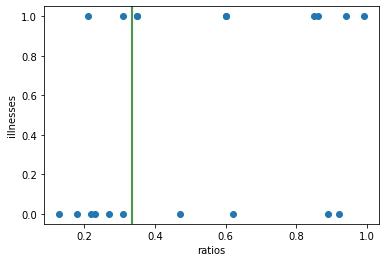

In [73]:

plt.scatter([rat[0] for rat in rats], [rat[1] for rat in rats])
plt.axvline(x=0.336, color="green")
plt.xlabel("ratios")
plt.ylabel("illnesses")